In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Input,LSTM, GRU, SimpleRNN, Dense, GlobalMaxPooling1D, Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
from tensorflow.keras.layers import Input,LSTM, GRU, SimpleRNN, Dense, GlobalMaxPooling1D, Embedding

In [ ]:
df=pd.read_csv('spam.csv',encoding='ISO-8859-1')

In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df=df.drop(['Unnamed: 2',	'Unnamed: 3',	'Unnamed: 4'],axis=1)
df.columns=['labels','data']
df['b_labels']=df['labels'].map({'ham':0,'spam':1})
Y=df['b_labels'].values

In [ ]:
dftrain,dftest,Ytrain,Ytest=train_test_split(df['data'],Y,test_size=0.33)

In [ ]:
# Adding tokenizer to convert into a sequence of strings
MAX_VOCAB_SIZE=20000
tokenizer=Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(dftrain)
seq_train=tokenizer.texts_to_sequences(dftrain)
seq_test=tokenizer.texts_to_sequences(dftest) # text to sequences maps each word to an unique integer and creates a seq of integers

In [ ]:
V=len(tokenizer.word_index)

In [ ]:
data_train=pad_sequences(seq_train)
T=data_train.shape[1]

In [ ]:
# MAX_SEQUENCE_LENGTH=5
data_test=pad_sequences(seq_test,maxlen=T)


In [ ]:
D=20
M=15
i=Input(shape=(T,))
x=Embedding(V+1,D)(i)# adding an embedding layer which is learnt through the model to create the optimal weights(vector representation of each word)
x=LSTM(M,return_sequences=True)(x)
x=GlobalMaxPooling1D()(x)
x=Dense(1,activation='sigmoid')(x)
model=Model(i,x)

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


In [ ]:
r=model.fit(data_train,Ytrain,epochs=10, validation_data=(data_test,Ytest))

Epoch 1/10
117/117 [==============================] - 9s 16ms/step - loss: 0.4317 - accuracy: 0.8703 - val_loss: 0.4022 - val_accuracy: 0.8570
Epoch 2/10
117/117 [==============================] - 1s 11ms/step - loss: 0.3456 - accuracy: 0.8703 - val_loss: 0.3270 - val_accuracy: 0.8570
Epoch 3/10
117/117 [==============================] - 1s 11ms/step - loss: 0.2530 - accuracy: 0.8703 - val_loss: 0.2366 - val_accuracy: 0.8570
Epoch 4/10
117/117 [==============================] - 1s 11ms/step - loss: 0.1757 - accuracy: 0.9062 - val_loss: 0.1669 - val_accuracy: 0.9636
Epoch 5/10
117/117 [==============================] - 1s 11ms/step - loss: 0.1110 - accuracy: 0.9885 - val_loss: 0.1203 - val_accuracy: 0.9788
Epoch 6/10
117/117 [==============================] - 1s 11ms/step - loss: 0.0697 - accuracy: 0.9914 - val_loss: 0.0950 - val_accuracy: 0.9772
Epoch 7/10
117/117 [==============================] - 1s 11ms/step - loss: 0.0447 - accuracy: 0.9933 - val_loss: 0.0818 - val_accuracy: 0.9782

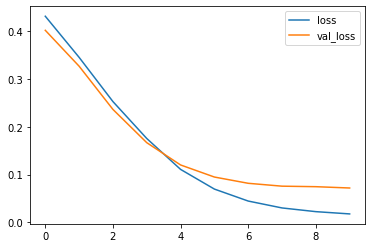

In [ ]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

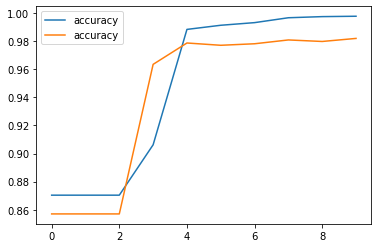

In [ ]:
import matplotlib.pyplot as plt
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='accuracy')
plt.legend()

In [ ]:
print(model.evaluate(data_test,Ytest))

58/58 [==============================] - 0s 6ms/step - loss: 0.0720 - accuracy: 0.9821
[0.07198408991098404, 0.9820554852485657]
